In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import graphviz


In [ ]:
!pip install shap
!pip install eli5

# 데이터 불러오기

In [ ]:
rawData=pd.read_csv('/content/drive/MyDrive/final/data/data.csv')
rawData

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


In [ ]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

# 컬럼분석

The "data.csv" file contains more than 160.000 songs collected from Spotify Web API. The dataset is from Spotify and contains 169k songs from the year 1921 to year 2020. Each year got top 100 songs.


- id (Id of track generated by Spotify)
- Numerical:
  - acousticness (Ranges from 0 to 1)
 - danceability (Ranges from 0 to 1)
 - energy (Ranges from 0 to 1)
  - duration_ms (Integer typically ranging from 200k to 300k)
  - instrumentalness (Ranges from 0 to 1)
  - valence (Ranges from 0 to 1)
  - popularity (Ranges from 0 to 100)
  - tempo (Float typically ranging from 50 to 150)
  - liveness (Ranges from 0 to 1)
  - loudness (Float typically ranging from -60 to 0)
  - speechiness (Ranges from 0 to 1)
  - year (Ranges from 1921 to 2020)
- Dummy:
  - mode (0 = Minor, 1 = Major)
  - explicit (0 = No explicit content, 1 = Explicit content)
- Categorical:
  - key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
  - artists (List of artists mentioned)
  - release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
  - name (Name of the song)

- valence 
  - 음원이 전달하는 음악적 긍정성을 설명하는 0.0에서 1.0 사이의 측정값.
  - valence 높은 음원은 더 긍정적으로 들리고(예: 행복, 명랑, 도취), 
  - valence가 낮은 음원은 더 부정적으로 들림(예: 슬픔, 우울, 화남).

In [ ]:
rawData['explicit'].value_counts()

0    155490
1     14419
Name: explicit, dtype: int64

In [ ]:
rawData['key'].value_counts()

0     21499
7     20757
2     18821
9     17628
5     16336
4     12921
1     12816
10    12056
8     10711
11    10593
6      8586
3      7185
Name: key, dtype: int64

C C# D D# E F F# G G# A A# B


## categorical column

In [ ]:
rawData.select_dtypes("object").columns

Index(['artists', 'id', 'name', 'release_date'], dtype='object')

In [ ]:
cat_col=['artists', 'id', 'name', 'release_date', 'mode', 'explicit', 'key']
rawData[cat_col]

,artists,id,name,release_date,mode,explicit,key
0,['Carl Woitschach'],6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,1928,1,0,10
1,"['Robert Schumann', 'Vladimir Horowitz']",6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento",1928,1,0,8
2,['Seweryn Goszczyński'],6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,1928,0,0,5
3,['Francisco Canaro'],6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),1928-09-25,0,0,1
4,"['Frédéric Chopin', 'Vladimir Horowitz']",6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1928,1,0,11
...,...,...,...,...,...,...,...
169904,"['DripReport', 'Tyga']",4KppkflX7I3vJQk7urOJaS,Skechers (feat. Tyga) - Remix,2020-05-15,1,1,1
169905,"['Leon Bridges', 'Terrace Martin']",1ehhGlTvjtHo2e4xJFB0SZ,Sweeter (feat. Terrace Martin),2020-06-08,1,0,8
169906,"['Kygo', 'Oh Wonder']",52eycxprLhK3lPcRLbQiVk,How Would I Know,2020-05-29,1,0,7
169907,"['Cash Cash', 'Andy Grammer']",3wYOGJYD31sLRmBgCvWxa4,I Found You,2020-02-28,1,0,1


In [ ]:
rawData.select_dtypes(exclude='object').columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'valence', 'year'],
      dtype='object')

## numerical column

In [ ]:
num_col=['acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness', 'liveness', 'loudness', 'popularity',
       'speechiness', 'tempo', 'valence', 'year']
rawData[num_col]

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,year
0,0.9950,0.708,158648,0.1950,0.563000,0.1510,-12.428,0,0.0506,118.469,0.7790,1928
1,0.9940,0.379,282133,0.0135,0.901000,0.0763,-28.454,0,0.0462,83.972,0.0767,1928
2,0.6040,0.749,104300,0.2200,0.000000,0.1190,-19.924,0,0.9290,107.177,0.8800,1928
3,0.9950,0.781,180760,0.1300,0.887000,0.1110,-14.734,0,0.0926,108.003,0.7200,1928
4,0.9900,0.210,687733,0.2040,0.908000,0.0980,-16.829,1,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,0.875,163800,0.4430,0.000032,0.0891,-7.461,75,0.1430,100.012,0.3060,2020
169905,0.0167,0.719,167468,0.3850,0.031300,0.1110,-10.907,64,0.0403,128.000,0.2700,2020
169906,0.5380,0.514,180700,0.5390,0.002330,0.1080,-9.332,70,0.1050,123.700,0.1530,2020
169907,0.0714,0.646,167308,0.7610,0.000000,0.2220,-2.557,70,0.0385,129.916,0.4720,2020


In [ ]:
print(min(rawData['year']), max(rawData['year']))

1921 2020


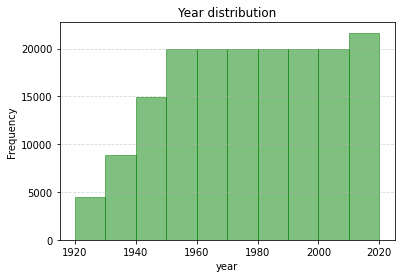

In [ ]:
rawData['year'].plot.hist(bins=range(1920,2021,10),color='g', edgecolor='g', alpha=0.5)
plt.title('Year distribution')
plt.xlabel('year')
plt.grid(True, axis='y', alpha=0.5, linestyle='--')
plt.show()

## 0~1 column

-  acousticness
- danceability
- energy 
- instrumentalness 
- valence
- liveness
- speechiness

In [ ]:
ZtoO_col=['acousticness', 'danceability', 'energy', 'instrumentalness', 'valence', 'liveness', 'speechiness']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



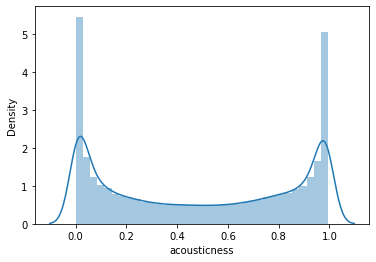

In [ ]:
sns.distplot(rawData['acousticness'],label='acousticness')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



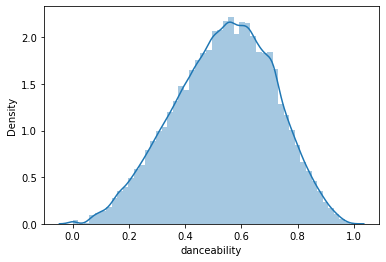

In [ ]:
sns.distplot(rawData['danceability'],label='danceability')
plt.show()

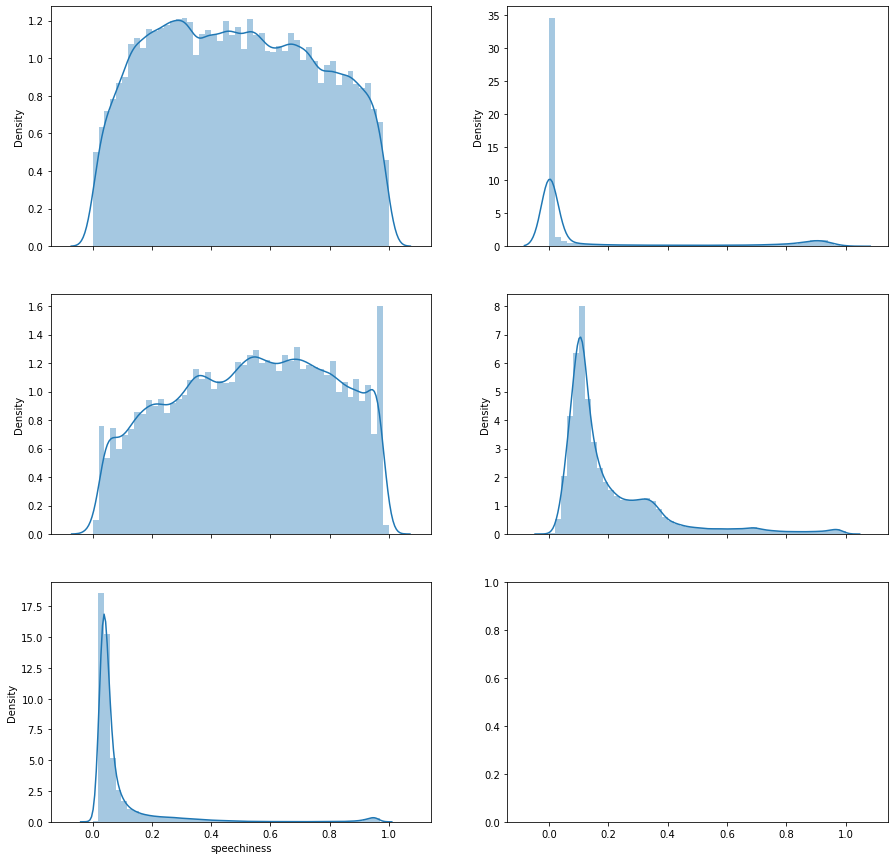

In [ ]:
f, axes=plt.subplots(3,2, figsize=(15,15), sharex=True)
sns.distplot(rawData['energy'], ax=axes[0,0])
sns.distplot(rawData['instrumentalness'],label='instrumentalness', ax=axes[0,1])
sns.distplot(rawData['valence'],label='valence', ax=axes[1,0])
sns.distplot(rawData['liveness'],label='liveness', ax=axes[1,1])
sns.distplot(rawData['speechiness'],label='speechiness', ax=axes[2,0])
                     

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Box(y=rawData['acousticness'],name='Acousticness'))
fig.add_trace(go.Box(y=rawData['danceability'],name='danceability'))
fig.add_trace(go.Box(y=rawData['energy'],name='energy'))
fig.add_trace(go.Box(y=rawData['instrumentalness'],name='instrumentalness'))
fig.add_trace(go.Box(y=rawData['valence'],name='valence'))
fig.add_trace(go.Box(y=rawData['liveness'],name='liveness'))
fig.add_trace(go.Box(y=rawData['speechiness'],name='speechiness'))

fig.show()

Output hidden; open in https://colab.research.google.com to view.

ZtoO_col 상관관계

In [ ]:
def makeCorr(x, width=25, height=12):
  plt.figure( figsize=(width, height) )
  mask = np.zeros_like(x.corr(), dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True
  sns.heatmap(x.corr(), annot=True, fmt='.2f', mask=mask, cmap='Blues')
  plt.show()

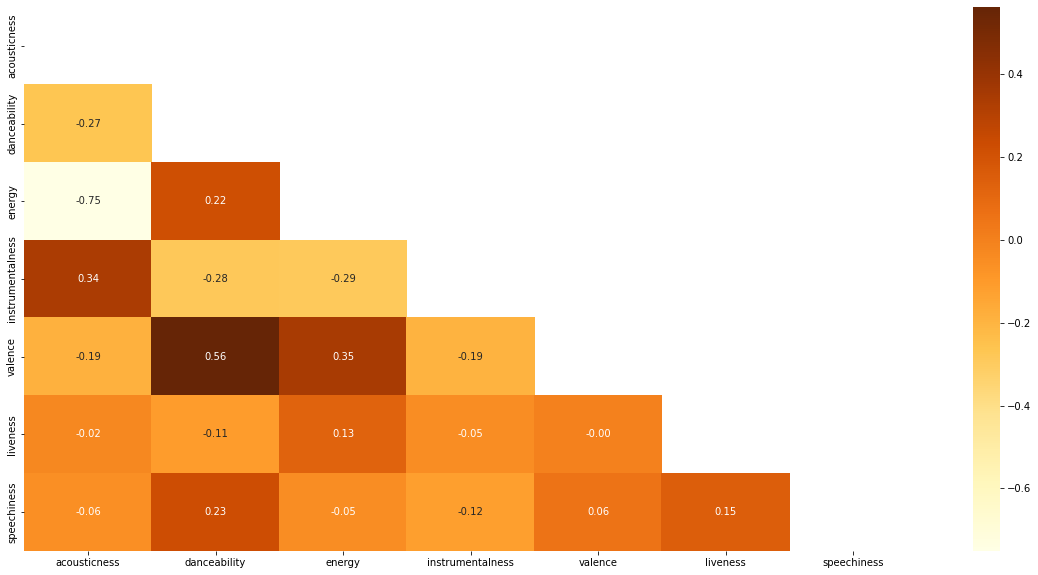

In [ ]:
makeCorr( rawData[ZtoO_col], width=20, height=10 )

- dancibility - valence
- energy - valence
- acousticness - instrumentalness

## tempo

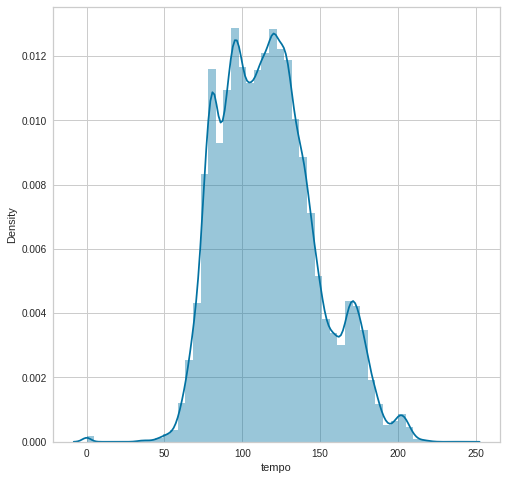

In [ ]:
sns.distplot(rawData['tempo'],label='tempo')
plt.show()

## Numerical col Corr

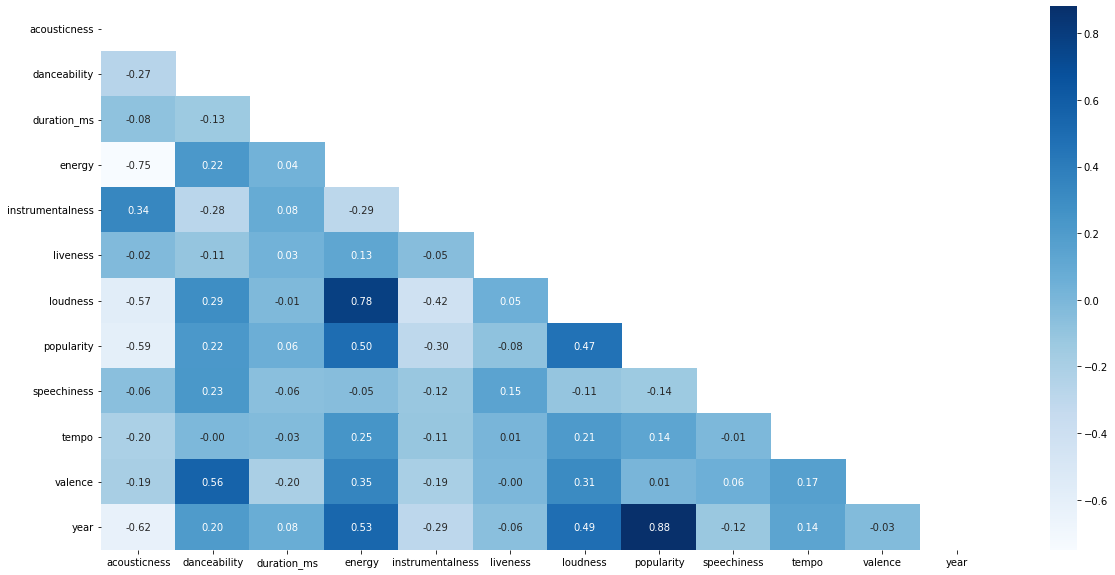

In [ ]:
makeCorr( rawData[num_col], width=20, height=10 )

 곡의 분위기를 `valence`로 본다면 `danceability`,`energy`, `loudness` 의 관계성이 높아보인다

In [ ]:
!pip install plotly==3.8.1
!pip install cufflinks

     |████████████████████████████████| 41.2 MB 2.3 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=3eb426ad603d676181dccfeab537731753953f4569eb6bdea4cf058143da1a5b
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cufflinks 0.17.3 requires plotly>=4.1.1, but you have plotly 3.8.1 which is incompatible.


     |████████████████████████████████| 27.7 MB 1.7 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 3.8.1
    Uninstalling plotly-3.8.1:
      Successfully uninstalled plotly-3.8.1


In [ ]:
import cufflinks as cf
import plotly.express as px

## popularity

In [ ]:
fig=px.histogram(rawData['popularity'], nbins=50)
fig.show()

In [ ]:
from yellowbrick.target import FeatureCorrelation

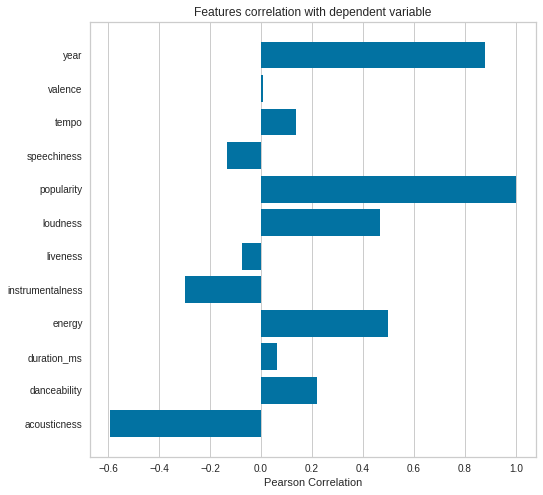

In [ ]:
X, y = rawData[num_col], rawData['popularity']

features = np.array(num_col)
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(8,8)
visualizer.fit(X, y)
visualizer.show()

##Minor vs Major

In [ ]:
mode_minor=rawData[rawData['mode']==0]
mode_major=rawData[rawData['mode']==1]

def mode_key(column):

  f, ax = plt.subplots(1, 2, figsize=(15, 10))

  sns.countplot(x = column,
                data = mode_minor,
                ax = ax[0],
                order = mode_minor[column].value_counts().index)
  ax[0].tick_params(labelsize=12)
  ax[0].set_title('Minor')
  ax[0].set_ylabel('count')
  ax[0].tick_params(rotation=50)

  sns.countplot(x = column,
                data = mode_major,
                ax = ax[1],
                order = mode_major[column].value_counts().index)
  ax[1].tick_params(labelsize=12)
  ax[1].set_title('Major')
  ax[1].set_ylabel('count')
  ax[1].tick_params(rotation=50)

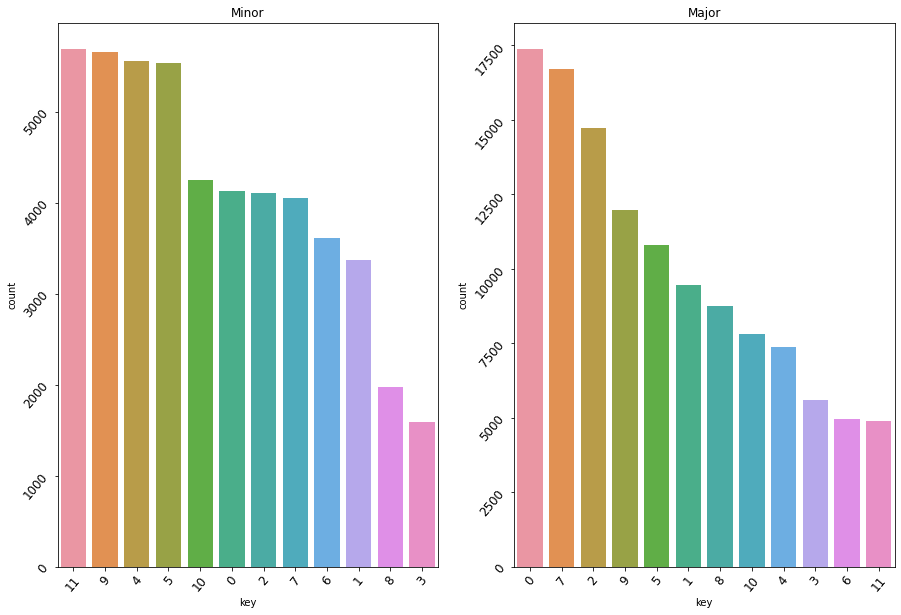

In [ ]:
mode_key('key')

In [ ]:
rawData['artists'].value_counts()

['Эрнест Хемингуэй']                                  1215
['Francisco Canaro']                                   938
['Эрих Мария Ремарк']                                  781
['Ignacio Corsini']                                    620
['Frank Sinatra']                                      592
                                                      ... 
['Don Omar', 'Zion & Lennox']                            1
['Sia', 'Alan Walker']                                   1
['Excision', 'Space Laces']                              1
['A$AP Mob', 'A$AP Rocky', 'A$AP Twelvyy', 'KEY!']       1
['Cash Cash', 'Andy Grammer']                            1
Name: artists, Length: 33375, dtype: int64